In [1]:
using Arpack
using LinearAlgebra
using CairoMakie
using LaTeXStrings
using Statistics
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/concentrated_new/lattice_BZ.jl")
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/bc_sign_flip/concentrated_spinors.jl")
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/bc_sign_flip/dirac_spinors.jl")
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/bc_sign_flip/patch_methods.jl")
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/concentrated_new/concentrated_BC.jl")

state_coefficients (generic function with 1 method)

In [2]:
# general parameters
pd = 50
kappa = 1
w = 10^(-2) * kappa
spacing = 0.4 * (w / 2 / pd)

4.000000000000001e-5

In [7]:
# 3-patch parameters
delta = -1
vF = 0

0

In [4]:
n = 1
w = 10^(-1) * kappa
pd = 50
spacing = 0.4 * (w / 2 / pd)

0.0004

In [8]:
alpha_list = (100) * [1, exp(pi/6 * im), exp(pi/3 * im), exp(pi/4 * im), exp(pi/2 * im), exp(2*pi/3 * im)]
# alpha_list = exp(im * pi/2) * [0, 10^6, 10^8, 10^10]

6-element Vector{ComplexF64}:
                 100.0 + 0.0im
     86.60254037844388 + 49.99999999999999im
    50.000000000000014 + 86.60254037844386im
     70.71067811865476 + 70.71067811865474im
 6.123233995736766e-15 + 100.0im
    -49.99999999999998 + 86.60254037844388im

In [13]:
function concentrated_decoupled_comp(pd, w, n, kappa, vF, delta, alpha_list)
    # get an mBZ centered at the kappa-point
    grid_sor = make_hex([kappa, 0], w / 2, w / 2 / pd)

    grid_patch = make_hex([0, 0], w / 2, w / 2 / pd)

    fig = Figure(size=(2000, 800 * length(alpha_list)), fontsize=25)

    for j in 1:length(alpha_list)
        alpha = alpha_list[j]
        sor_bc = concentrated_spinor_bc(grid_sor, spacing, n, w) .+ 
        bc_no_spinors(grid_patch, spacing, vF, kappa, delta, alpha)[1]

        patch_bc = concentrated_patch_bc(grid_patch, spacing, n, w, kappa, vF, delta, alpha)

        ax1 = Axis(fig[j, 1], title = string(angle(alpha) / pi), 
        xlabel = L"k_x", ylabel = L"k_y")
        tricontourf!(ax1, grid_patch[:, 1], grid_patch[:, 2], patch_bc, colormap = :Spectral)
        X, ax1, tr1 = tricontourf(grid_patch[:, 1], grid_patch[:, 2], patch_bc, colormap = :Spectral)
        cb1 = Colorbar(fig[j, 2], tr1)

        ax3 = Axis(fig[j, 3], title = string(angle(alpha) / pi)
        , xlabel = L"k_x", ylabel = L"k_y")
        tricontourf!(ax3, grid_sor[:, 1], grid_sor[:, 2], sor_bc, colormap = :Spectral)
        X, ax3, tr3 = tricontourf(grid_sor[:, 1], grid_sor[:, 2], sor_bc, colormap = :Spectral)
        cb3 = Colorbar(fig[j, 4], tr3)
    end
    ax_c1 = Axis(fig[:, 1], title = L"\text{3-Patch } \Omega (\textbf{k})", titlegap = 60)
    hidedecorations!(ax_c1, label = false)
    hidespines!(ax_c1)

    ax_c2 = Axis(fig[:, 3], title = L"\text{Decoupled } \Omega (\textbf{k})", titlegap = 60)
    hidedecorations!(ax_c2, label = false)
    hidespines!(ax_c2)

    fig
end

concentrated_decoupled_comp (generic function with 1 method)

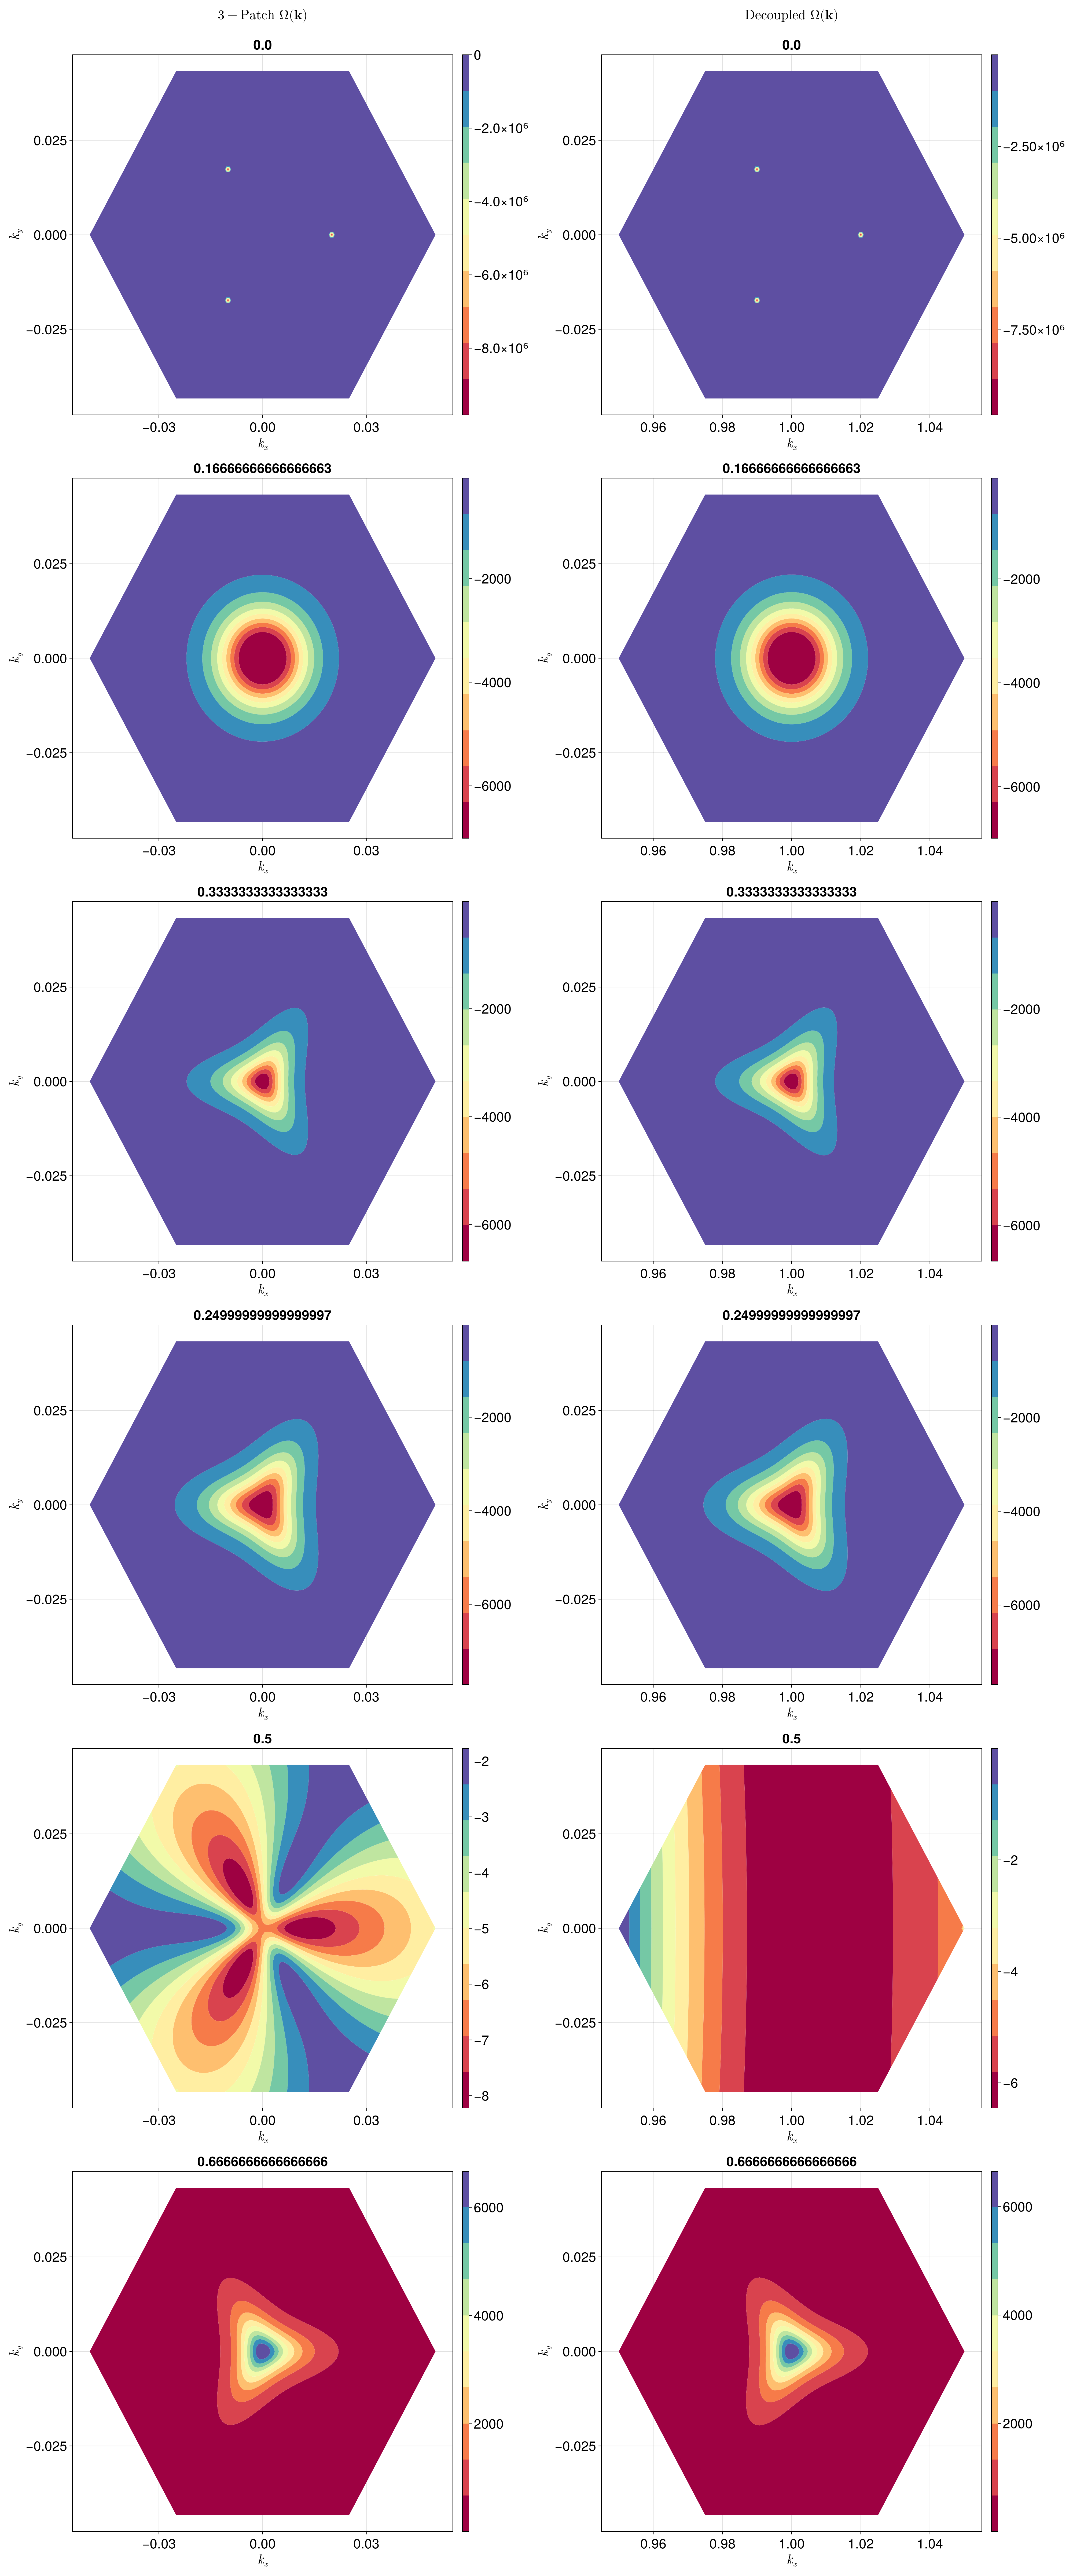

In [14]:
concentrated_decoupled_comp(pd, w, n, kappa, vF, delta, alpha_list)